In [1]:
import pandas as pd
import numpy as np

### Step 1: Importing Data

In [2]:
df= pd.read_csv('train.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,144035,-0.795465,1.035145,0.629094,1.060550,0.185512,0.442982,0.367739,0.629104,-0.215407,...,-0.224165,-0.406332,-0.113468,-0.519506,0.062945,-0.625920,0.305893,0.130054,35.80,0
1,57027,-2.335655,2.225380,-3.379450,2.178538,-3.568264,0.316814,-1.734948,1.449139,-1.980033,...,0.785540,0.297412,0.308536,-0.598416,-0.121850,-0.491018,0.701606,0.206966,444.17,1
2,75347,1.485941,-0.325035,-0.551499,-0.845371,-0.216371,-0.917921,-0.011792,-0.375973,-1.136155,...,0.145207,0.346199,-0.281322,-0.404634,0.909394,-0.034868,-0.030328,-0.004064,25.00,0
3,75424,-0.804963,0.712653,1.360827,-0.332024,1.302313,1.623387,0.551873,0.637665,-0.844825,...,0.219177,0.644723,-0.258438,-1.357390,0.469040,-0.272856,0.023010,-0.053357,18.95,0
4,102676,-5.552122,5.678134,-9.775528,8.416295,-4.409844,-1.506235,-6.899839,3.750443,-3.879793,...,1.128472,0.228484,0.286258,-0.536294,-0.104925,0.420919,-0.297557,-0.946184,119.74,1


### Step 2: Cleaning Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 31 columns):
Time      902 non-null int64
V1        902 non-null float64
V2        902 non-null float64
V3        902 non-null float64
V4        901 non-null float64
V5        901 non-null float64
V6        901 non-null float64
V7        901 non-null float64
V8        901 non-null float64
V9        902 non-null float64
V10       902 non-null float64
V11       902 non-null float64
V12       902 non-null float64
V13       902 non-null float64
V14       901 non-null float64
V15       901 non-null float64
V16       901 non-null float64
V17       901 non-null float64
V18       901 non-null float64
V19       901 non-null float64
V20       902 non-null float64
V21       902 non-null float64
V22       902 non-null float64
V23       902 non-null float64
V24       902 non-null float64
V25       902 non-null float64
V26       902 non-null float64
V27       902 non-null float64
V28       902 non-null float6

In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        1
V5        1
V6        1
V7        1
V8        1
V9        0
V10       0
V11       0
V12       0
V13       0
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df[df['V4'].isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
900,11131,-1.426623,4.141986,-9.804103,NaN,NaN,NaN,NaN,NaN,-3.249516,...,1.865679,0.407809,0.605809,-0.769348,-1.746337,0.50204,1.977258,0.711607,1.0,1


In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().values.any()

False

### Step 3: Data Preprocessing

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,89579.985556,-2.302370,1.776772,-3.533859,2.210778,-1.613497,-0.699977,-2.703860,0.381013,-1.270022,...,0.366111,-0.005000,-0.031945,-0.038475,0.030377,0.025562,0.077531,0.036373,108.953633,0.500000
std,48739.857474,5.546627,3.672593,6.171931,3.174811,4.342731,1.890163,5.877914,4.853342,2.297901,...,2.702693,1.139523,1.196382,0.573055,0.661572,0.468758,0.989314,0.421468,308.928972,0.500278
min,406.000000,-30.552380,-8.402154,-31.103685,-4.401290,-29.730600,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.149923,-7.263482,-1.869290,0.000000,0.000000
25%,47249.750000,-2.825991,-0.195431,-5.068730,-0.105275,-1.775001,-1.587624,-2.992775,-0.178557,-2.301580,...,-0.162558,-0.543180,-0.226998,-0.379574,-0.301918,-0.295559,-0.059425,-0.053411,1.625000,0.000000
50%,81674.500000,-0.712196,0.896925,-1.456225,1.206713,-0.458894,-0.672049,-0.602134,0.150282,-0.680745,...,0.130469,-0.017277,-0.025929,0.016212,0.049648,-0.026232,0.046411,0.027474,18.970000,0.500000
75%,138944.250000,1.138937,2.777569,0.366721,4.173330,0.529846,0.035199,0.266629,0.944850,0.213191,...,0.651412,0.570253,0.194164,0.382373,0.393059,0.350455,0.419129,0.206210,99.990000,1.000000
max,172622.000000,2.369906,22.057729,3.225532,12.114672,11.095089,21.307738,31.527244,20.007208,4.762324,...,27.202839,8.361985,5.466230,3.569702,2.208209,1.884741,4.655054,3.503999,6454.740000,1.000000


In [11]:
df.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,450,450,450,450,450,450,450,450,450,450,...,450,450,450,450,450,450,450,450,450,450
1,450,450,450,450,450,450,450,450,450,450,...,450,450,450,450,450,450,450,450,450,450


In [12]:
X_df = df.drop(columns=['Class'])
y_df = df['Class']

In [13]:
X_df.shape, y_df.shape

((900, 30), (900,))

In [14]:
X = np.array(X_df)
y = np.array(y_df)

In [15]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse=False)
y = onehot.fit_transform(y.reshape(y.shape[0], 1))
y.shape

(900, 2)

### Step 4: Splitting Data into Train and Valid Set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20, shuffle=True)

In [18]:
# #optional step
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_valid = scale.transform(X_valid)

In [19]:
X_train.shape , X_valid.shape, y_train.shape, y_valid.shape

((720, 30), (180, 30), (720, 2), (180, 2))

### Step 5: Modelling Data

In [20]:
import tensorflow as tf

/root/miniconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [21]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.25)


In [22]:
# import numpy as np

# X = np.random.random_integers(low=1, high= 5, size=(5,10))
# y = np.random.random_integers(low=1, high= 5, size=(10,1))
# X.shape, y.shape
# #y=y.reshape(y.shape[0],1)
# #y.shape
# print(X, y)
# z = X + y
# print(z)
# #z.shape

In [23]:
# def model(x):
#     mu = 0
#     sigma = 0.05
    
    
    
#     weights_1 = tf.Variable(tf.random_normal(shape=(30,1000) ,mean = mu, stddev= sigma))
#     bias_1 = tf.Variable(tf.zeros(1000))
#     product_1 = tf.matmul(x, weights_1 ) + bias_1
    
#     layer_1 = tf.nn.relu(product_1)
    
#     weights_2 = tf.Variable(tf.random_normal(shape=(1000,500) , mean= mu, stddev=sigma))
#     bias_2 = tf.Variable(tf.zeros(500))
#     product_2 = tf.matmul(layer_1 , weights_2  ) + bias_2 

#     layer_2 = tf.nn.relu(product_2)

#     weights_3 = tf.Variable(tf.random_normal(shape=(500,50) , mean= mu, stddev=sigma))
#     bias_3 = tf.Variable(tf.zeros(50))
#     product_3 = tf.matmul( layer_2 , weights_3  ) + bias_3
    
#     layer_3= tf.nn.relu(product_3)
    
#     weights_4 = tf.Variable(tf.random_normal(shape=(50,1) , mean= mu, stddev=sigma))
#     bias_4 = tf.Variable(tf.zeros(1))
#     product_4 = tf.matmul( layer_3 , weights_4  ) + bias_4

    
#     return product_4
    

In [24]:
# def model_xe(x):
#     mu = 0
#     sigma = 0.004
    
#     print(x.shape)
#     initializer = tf.contrib.layers.xavier_initializer()
#     weights_1 = tf.Variable(initializer(shape=(1000,30)))
#     bias_1 = tf.Variable(initializer(shape=(1000,1)))
#     product_1 = tf.matmul(weights_1 , tf.transpose(x)) + bias_1
    
#     layer_1 = tf.nn.relu(product_1)
#     print(layer_1.shape)
    
#     weights_2 = tf.Variable(initializer(shape=(500,1000)))
#     bias_2 = tf.Variable(initializer((500,1)))
#     product_2 = tf.matmul(weights_2 , layer_1 ) + bias_2 

#     layer_2 = tf.nn.relu(product_2)

#     weights_3 = tf.Variable(initializer(shape=(50,500) ))
#     bias_3 = tf.Variable(initializer((50,1)))
#     product_3 = tf.matmul(  weights_3 , layer_2  ) + bias_3
    
#     layer_3= tf.nn.relu(product_3)
    
#     weights_4 = tf.Variable(initializer(shape=(1,50) ))
#     bias_4 = tf.Variable(initializer((1,1)))
#     product_4 = tf.matmul(  weights_4 , layer_3  ) + bias_4

    
#     return product_4
    

In [25]:
# def model_keras(x):
#     model_k = tf.keras.models.Sequential()
#     model_k.add(tf.keras.layers.BatchNormalization(input_shape=(30,)))
#     model_k.add(tf.keras.layers.Dense(1000, activation='relu'))
#     model_k.add(tf.keras.layers.Dropout(0.2))

#     model_k.add(tf.keras.layers.BatchNormalization())
#     model_k.add(tf.keras.layers.Dense(500, activation='relu'))
#     model_k.add(tf.keras.layers.BatchNormalization())

#     model_k.add(tf.keras.layers.Dense(50, activation='relu'))
#     model_k.add(tf.keras.layers.BatchNormalization())

#     model_k.add(tf.keras.layers.Dense(1))
#     model_k.add(tf.keras.layers.Activation('sigmoid'))
#     model_k.compile(tf.keras.optimizers.Adam(lr=0.00001) , loss = 'binary_crossentropy', metrics=['accuracy'])
#     return model_k

In [26]:
# model_keras = model_keras(X_train)

In [27]:
# model_keras.fit(X_train, y_train, epochs=30, verbose =1, validation_data=(X_valid, y_valid))

In [28]:
# def model_le(x):
   
#     #l1 = tf.layers.batch_normalization(x)
#     l1 = tf.layers.Dense(units=1000,activation=tf.nn.relu, kernel_initializer= tf.glorot_uniform_initializer())(x)
#     l1 =tf.layers.Dropout(rate=0.2)(l1)
    
#     #l1 = tf.layers.batch_normalization(l1)
    
#     l2 = tf.layers.Dense(500, activation= tf.nn.relu, kernel_initializer=tf.glorot_uniform_initializer())(l1)
#     #l2 = tf.layers.batch_normalization(l2)
    
#     l3 = tf.layers.Dense(50, activation= tf.nn.relu, kernel_initializer=tf.glorot_uniform_initializer())(l2)
#     #l3 = tf.layers.batch_normalization(l3)
    
#     l4 = tf.layers.Dense(1, kernel_initializer=tf.glorot_uniform_initializer())(l3)
    
#     return l4
    

In [29]:
# # forward propagation 
# # model(x)

# learn_rate = 0.0001

# x_pass = tf.placeholder(dtype=tf.float32,  shape = (None, 30))
# y_pass = tf.placeholder(dtype = tf.float32 , shape = (None))

# forward_prop =  model_le(x_pass)

# loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = y_pass, logits=forward_prop)

# total_loss = tf.reduce_mean(loss)

# optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate)

# backward_prop = optimizer.minimize(total_loss)

In [30]:
# correct_prediction = tf.equal(tf.cast(tf.greater_equal(loss,0.5), tf.float32) , y_pass)
# #correct_prediction = tf.equal(tf.argmax(forward_prop, 1), tf.argmax(y_pass, 1))
# accuracy_operation =  tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [31]:
# with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
#     sess.run(tf.global_variables_initializer())
#     print('Training...')
#     for i in range(epochs):
#         #log = sess.run(tf.cast(tf.greater_equal(loss,0.5), tf.float32) , feed_dict={x_pass: X_train , y_pass: y_train.reshape(y_train.shape[0],1)})
#         #print(log, feed_dict={x_pass: X_train , y_pass: y_train.reshape(y_train.shape[0],1)}))
#         #print(log.shape)
#         #print(sess.run(tf.equal(log , y_train.reshape(y_train.shape[0],1))))
#         sess.run( backward_prop , feed_dict={x_pass: X_train , y_pass: y_train})
#         train_loss = sess.run(total_loss, feed_dict={x_pass:X_train , y_pass: y_train})
#         validation_loss = sess.run(total_loss, feed_dict={x_pass:X_valid , y_pass: y_valid})
#         train_accuracy = sess.run(accuracy_operation, feed_dict={x_pass:X_train, y_pass:y_train})
#         accuracy = sess.run(accuracy_operation, feed_dict={x_pass:X_valid, y_pass:y_valid})
#         print(train_loss ,"  ",validation_loss,"  ",train_accuracy," ", accuracy, " ")

In [47]:
def model_soft(x, dropout):
   
    #l1 = tf.layers.batch_normalization(x)
    l1 = tf.layers.Dense(units=1000,activation=tf.nn.relu, kernel_initializer= tf.glorot_uniform_initializer())(x)
    l1 =tf.layers.Dropout(rate=dropout)(l1)
    
    l1 = tf.layers.batch_normalization(l1)
    
    l2 = tf.layers.Dense(500, activation= tf.nn.relu, kernel_initializer=tf.glorot_uniform_initializer())(l1)
    l2 =tf.layers.Dropout(rate=dropout)(l2)
    l2 = tf.layers.batch_normalization(l2)
    
    l3 = tf.layers.Dense(50, activation= tf.nn.relu, kernel_initializer=tf.glorot_uniform_initializer())(l2)
    #l3 = tf.layers.batch_normalization(l3)
    l3 =tf.layers.Dropout(rate=dropout)(l3)
    
    l4 = tf.layers.Dense(2, kernel_initializer=tf.glorot_uniform_initializer())(l3)
    
    return l4

In [48]:
learn_rate = 0.0001

x_pass = tf.placeholder(dtype=tf.float32,  shape = (None, 30))
y_pass = tf.placeholder(dtype = tf.float32 , shape = (None,2))
dropout =  tf.placeholder(dtype=tf.float32)

forward_prop =  model_soft(x_pass , dropout)

loss = tf.nn.softmax_cross_entropy_with_logits(labels = y_pass, logits=forward_prop)

total_loss = tf.reduce_mean(loss)

optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate)

backward_prop = optimizer.minimize(total_loss)

correct_prediction = tf.equal(tf.argmax(forward_prop,1) , tf.argmax(y_pass,1))
#correct_prediction = tf.equal(tf.argmax(forward_prop, 1), tf.argmax(y_pass, 1))
accuracy_operation =  tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [49]:
epochs =100

In [50]:
saver = tf.train.Saver()

In [51]:
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    sess.run(tf.global_variables_initializer())
    print('Training...')
    val_loss=[]
    tra_loss = []
    val_acc= []
    tra_acc =[]
    for i in range(epochs):
        sess.run( backward_prop , feed_dict={x_pass: X_train , y_pass: y_train, dropout:0.2})
        train_loss = sess.run(total_loss, feed_dict={x_pass:X_train , y_pass: y_train,  dropout:0.2})
        tra_loss.append(train_loss)
        validation_loss = sess.run(total_loss, feed_dict={x_pass:X_valid , y_pass: y_valid,  dropout:0})
        val_loss.append(validation_loss)
        train_accuracy = sess.run(accuracy_operation, feed_dict={x_pass:X_train, y_pass:y_train, dropout:0})
        tra_acc.append(train_accuracy)
        accuracy = sess.run(accuracy_operation, feed_dict={x_pass:X_valid, y_pass:y_valid, dropout:0.2})
        val_acc.append(accuracy)
        print(train_loss ,"  ",validation_loss,"  ",train_accuracy," ", accuracy, " ")
    saver.save(sess, './nn')
    

Training...
0.6840137    0.68174404    0.56527776   0.6333333  
0.6722747    0.66915005    0.63611114   0.67777777  
0.6623379    0.6589007    0.6875   0.7222222  
0.6543195    0.6502943    0.7083333   0.74444443  
0.64622504    0.6420336    0.7347222   0.76111114  
0.6383381    0.6341696    0.75416666   0.78333336  
0.6307886    0.6264403    0.7736111   0.78333336  
0.6233053    0.6187269    0.78055555   0.7888889  
0.6158569    0.6110201    0.78333336   0.7888889  
0.608361    0.6032463    0.7861111   0.79444444  
0.6008383    0.59546506    0.7888889   0.79444444  
0.5933543    0.5876683    0.79583335   0.8055556  
0.5859258    0.5800261    0.8041667   0.8055556  
0.5786569    0.57261294    0.8125   0.81666666  
0.57157016    0.56540936    0.8263889   0.82222223  
0.5645877    0.5583542    0.8361111   0.8333333  
0.55764896    0.55140275    0.84583336   0.84444445  
0.5507092    0.54447937    0.8513889   0.84444445  
0.54376477    0.5375443    0.85833335   0.85555553  
0.5368093    0

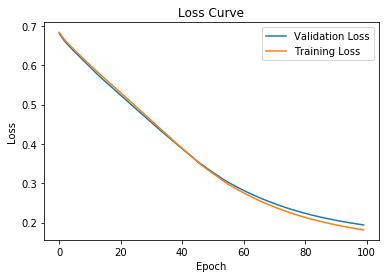

In [52]:
import matplotlib.pyplot as plt
plt.plot(val_loss)
plt.plot(tra_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(['Validation Loss', 'Training Loss'])
plt.show()

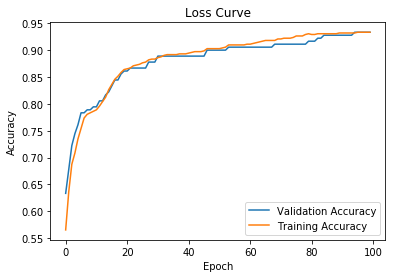

In [53]:
import matplotlib.pyplot as plt
plt.plot(val_acc)
plt.plot(tra_acc)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Loss Curve')
plt.legend(['Validation Accuracy', 'Training Accuracy'])
plt.show()

In [58]:
### Step 6: Inference on Test Set

test_df = pd.read_csv('./test.csv')

test_df.head()

y_test = np.array(test_df['Class'])

x_test =  np.array(test_df.drop(columns='Class'))

x_test.shape, y_test.shape

((100, 30), (100,))

In [59]:
X_test = MinMaxScaler().fit_transform(x_test)

In [60]:
y_test[0:10]

array([1., 0., 0., 0., 1., 0., 0., 1., 0., 0.])

In [61]:
y_test = OneHotEncoder(sparse=False).fit_transform(y_test.reshape(y_test.shape[0] , 1))

In [76]:
test_logits = tf.Variable(tf.zeros(shape=y_test.shape))

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    acc = sess.run( accuracy_operation , feed_dict={x_pass: X_test, y_pass: y_test, dropout:0})
    print(acc)
    logits = sess.run( forward_prop , feed_dict={x_pass: X_test, y_pass: y_test, dropout:0})
    test_logits = logits
    #train_loss = sess.run(total_loss, feed_dict={x_pass:X_train , y_pass: y_train})
    #tra_loss.append(train_loss)

INFO:tensorflow:Restoring parameters from ./nn
0.94


In [77]:
### Step 7: Checking Metrics for Performance

from sklearn.metrics import classification_report, confusion_matrix



#y_pred = (y_pred >= 0.5).astype(int)

#y_pred.shape

y_pred = np.argmax(test_logits,1)
y_actual = np.argmax(y_test,1)

print(classification_report(y_actual, y_pred))

print(confusion_matrix(y_actual,y_pred))

             precision    recall  f1-score   support

          0       0.89      1.00      0.94        50
          1       1.00      0.88      0.94        50

avg / total       0.95      0.94      0.94       100

[[50  0]
 [ 6 44]]


In [ ]:

# import keras
# from keras.layers import BatchNormalization
# from keras.layers.core import Flatten,Dense,Dropout, Activation, Lambda
# from keras.models import Model, Sequential
# from keras.optimizers import Adam,SGD
# from keras.callbacks import TensorBoard

In [ ]:
# model = Sequential()
# #model.add(Lambda(lambda x: x , input_shape = (24)))
# #model.add(Lambda(lambda x: x+0.1 , input_shape = (64,64,3)))
# #model.add(Flatten())
# model.add(BatchNormalization(input_shape=(30,)))
# model.add(Dense(1000))
# model.add(Activation('relu'))


# model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(Dense(500))
# model.add(Activation('relu'))
# #model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(Dense(50))
# model.add(Activation('relu'))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))
# model.compile(optimizer = Adam(lr=0.00001) , loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
# model.summary()

In [ ]:
# model.fit(X_train, y_train, epochs=30, verbose =1, validation_data=(X_valid, y_valid))

In [ ]:
# import matplotlib.pyplot as plt
# plt.plot(model.history.history['loss'])
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Loss Curve')
# plt.show()

In [ ]:
# plt.plot(model.history.history['acc'])
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Training Accuracy Curve')
# plt.show()

### Step 6: Inference on Test Set

In [ ]:
# test_df = pd.read_csv('./test.csv')

In [ ]:
# test_df.head()

In [ ]:
# y_test = np.array(test_df['Class'])

In [ ]:
# x_test =  np.array(test_df.drop(columns='Class'))

In [ ]:
# x_test.shape, y_test.shape

### Step 7: Checking Metrics for Performance

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# y_pred = model.predict(x_test)

In [ ]:
# y_pred = (y_pred >= 0.5).astype(int)

In [ ]:
# y_pred[0:5]

In [ ]:
# print(classification_report(y_test, y_pred))

In [ ]:
# print(confusion_matrix(y_test,y_pred))